In [10]:
import os
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import axes3d, Axes3D
import optunity
import random
import numpy as np

In [18]:
file = "2019-08-20T17_14_13.821028+00_00_LBL_PyridiniumIodide.csv"
df=pd.read_csv(file)

In [19]:
df = df.drop(['Reagent4 (ul)', 'Reagent5 (ul)'], axis = 1)

In [20]:
# Calculate compositional concentrations
df['totalvolume'] = df['Reagent1 (ul)'] + df['Reagent2 (ul)'] + df['Reagent3 (ul)'] + df['Reagent6 (ul)'] + df['Reagent7 (ul)']
df['_rxn_M_inorganic'] = (df['Reagent2 (ul)']*df['Reagent 2_conc_Pb'])/df['totalvolume']
df['_rxn_M_organic'] = ((df['Reagent2 (ul)']*df['Reagent 2_conc_A']) + (df['Reagent3 (ul)']*df['Reagent_3_conc']))/df['totalvolume']
df['_rxn_M_acid'] = ((df['Reagent6 (ul)']+df['Reagent7 (ul)'])*1.22/46)/(df['totalvolume']/1000)

In [21]:
df_new = df.filter(['_rxn_M_inorganic', '_rxn_M_organic', '_rxn_M_acid', 'crystal score'])

In [22]:
df_new

_rxn_M_inorganic  _rxn_M_organic  _rxn_M_acid  crystal score
0           0.372040        0.424400     4.880000              1
1           0.576400        0.683500     0.265217              1
2           0.324880        0.774700     8.062609              2
3           0.209600        0.376200     4.402609              1
4           0.375411        0.399259     2.923238              1
5           0.757180        0.809540     5.357391              3
6           0.848880        0.979780     5.728696              3
7           0.175540        0.801480     2.864348              1
8           0.641900        0.891800     4.402609              2
9           0.002620        0.054980    11.351304              1
10          0.573780        0.833200     0.318261              1
11          0.497800        0.635840     8.540000              3
12          0.806960        0.880740     0.848696              1
13          0.518760        0.894800     4.031304              1
14          0.131263        0.846693     2.763788              1
15          0.233180        0.321240     4.826957              1
16          0.518760        0.744860     2.174783              1
17          0.290820        0.674000     1.379130              1
18          0.626180        1.130740     1.750435              1
19          0.693066        0.805150     3.454736              1
20          0.230100        0.355988     8.734705              3
21          0.065631        0.165792     6.537423              1
22          0.233180        0.337900     3.606957              1
23          0.262000        0.599960     4.508696              1
24          0.681200        0.743080     8.168696              2
25          0.217460        0.622060     1.909565              1
26          0.191260        0.491140     2.652174              1
27          0.272480        0.705640    11.139130              2
28          0.136513        0.463226     5.633876              1
29          0.291403        0.584729     7.122070              2
..               ...             ...          ...            ...
66          0.388537        0.565010     3.082687              1
67          0.458500        0.591780     9.335652              3
68          0.847956        0.962425     5.527577              3
69          0.141480        0.186700    14.215652              3
70          0.096940        0.984680     3.500870              1
71          0.223146        0.282766     0.956696              1
72          0.241523        0.768557     4.305132              1
73          0.413960        0.611500     8.380870              3
74          0.151960        0.339980     0.159130              1
75          0.246280        0.458100     3.447826              1
76          0.251520        0.760840     5.834783              2
77          0.288200        0.811800     8.221739              2
78          0.309780        0.398016    12.011850              3
79          0.390380        0.749760     4.880000              1
80          0.345840        0.807560     9.017391              3
81          0.539720        0.608740    13.154783              2
82          0.544960        0.702040    10.290435              2
83          0.400860        0.550800     4.243478              1
84          0.327500        0.917740     0.901739              1
85          0.416580        0.640300     6.206087              2
86          0.188640        0.700340     5.251304              1
87          0.047160        0.232800     3.288696              1
88          1.013347        1.125431     0.265749              1
89          0.393788        0.517796     1.966542              1
90          0.005230        0.708303     0.741126              1
91          0.652380        0.754720     5.622609              2
92          0.123387        0.631343     3.082687              1
93          1.089920        1.168460     1.803478              1
94          0.094132        0.364910    11.275709              2
95          0.372040        1.097940   

In [23]:
point = np.array(df_new)

<IPython.core.display.Javascript object>


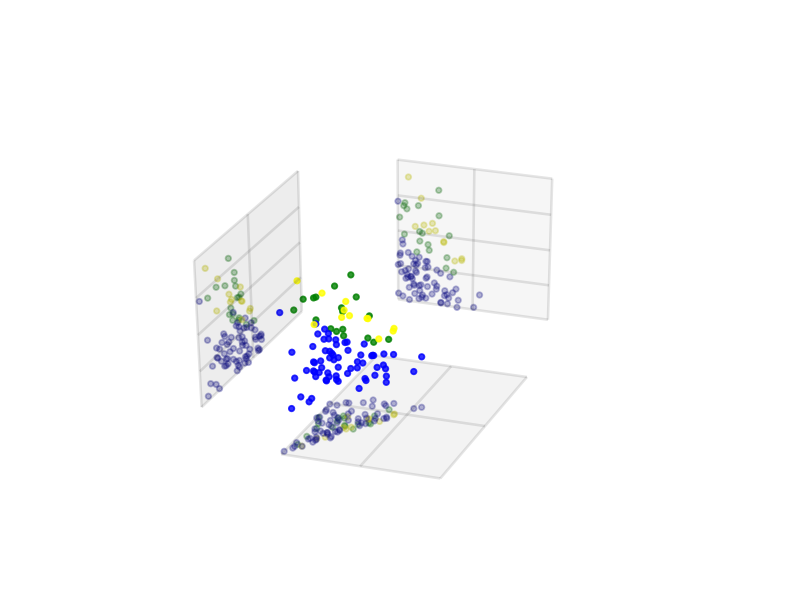

In [25]:
amine_name = "PyridiniumIodide" # The ammonium you would like to plot
x_range = [0, 3]
y_range = [0, 3]
z_range = [0, 20]
xy_plane = z_range[0] - 4
xz_plane = y_range[1] - 0.5
yz_plane = x_range[0] - 1
x_step = 1
y_step = 1
z_step = 4

%matplotlib notebook

# 3D plot
color_type = ['blue', 'green','yellow','red']
color_type_2D = ['navy', 'darkgreen','y','darkred']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(1,5):
    s = 10 if i == 4 else 10
    ax.scatter(point[:,0][point[:,3]==i], \
               point[:,1][point[:,3]==i], \
               point[:,2][point[:,3]==i], \
               c = color_type[i-1], s = s, alpha=0.8)



# 2D projections plot
for i in range(1,5):
    s = 10 if i == 4 else 10
    ax.scatter(point[:,0][point[:,3]==i],point[:,2][point[:,3]==i], \
               marker = 'o', c = color_type_2D[i-1], s = s, zdir = 'y', zs = xz_plane, alpha=0.3)
    ax.scatter(point[:,1][point[:,3]==i], point[:,2][point[:,3]==i], \
               marker = 'o', c = color_type_2D[i-1], s = s, zdir = 'x', zs = yz_plane, alpha=0.3)
    ax.scatter(point[:,0][point[:,3]==i], point[:,1][point[:,3]==i], \
               marker = 'o', c = color_type_2D[i-1], s = s, zdir='z', zs = xy_plane, alpha=0.3)

# make 2D planes with meshgrid and labels
yy, zz = np.meshgrid(np.arange(y_range[0],y_range[1], y_step), np.arange(z_range[0],z_range[1],z_step))
xx = np.ones((len(np.arange(z_range[0],z_range[1],z_step)), len(np.arange(y_range[0],y_range[1], y_step))))*yz_plane
ax.plot_surface(xx,yy,zz, color = "silver", alpha = 0.1)
ax.plot_wireframe(xx,yy,zz, color = "black", alpha = 0.1)


xx, yy = np.meshgrid(np.arange(x_range[0],x_range[1], x_step), np.arange(y_range[0],y_range[1], y_step))
zz = np.ones((len(np.arange(y_range[0],y_range[1], y_step)), len(np.arange(x_range[0],x_range[1], x_step))))*xy_plane
ax.plot_surface(xx,yy,zz, color = "silver", alpha = 0.1)
ax.plot_wireframe(xx,yy,zz, color = "black", alpha = 0.1)

xx, zz = np.meshgrid(np.arange(x_range[0],x_range[1], x_step), np.arange(z_range[0],z_range[1],z_step))
yy = np.ones((len(np.arange(z_range[0],z_range[1], z_step)), len(np.arange(x_range[0],x_range[1], x_step))))*xz_plane
ax.plot_surface(xx,yy,zz, color = "silver", alpha = 0.1)
ax.plot_wireframe(xx,yy,zz, color = "black", alpha = 0.1)


ax.set_axis_off()
ax.view_init(elev=30, azim=-70)
ax.set_xlim(yz_plane,x_range[1])
ax.set_ylim(y_range[0],xz_plane)
ax.set_zlim(xy_plane,z_range[1])

plt.savefig('Outcome_plot_'+ amine_name + '.svg', format = "svg", transparent=True)